In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Regresiones

Nuestro problema ahora es el siguiente:
$$f(x_1,x_2,...,x_n)\simeq y$$

Transformamos ese problema al siguiente

$$\lVert f(x_1,x_2,...,x_n)-y\rVert \rightarrow \min$$

Vamos a realizar la prueba en el caso lineal a una sola variable


$$\lVert Ax-y\rVert \rightarrow \min$$

Si llamamos

$$g(x)=\lVert Ax-y\rVert^2 $$

Entonces

$$g(x)=(Ax-y)^T(Ax-y)=(x^TA^T-y^T)(Ax-y)=x^TA^TAx-x^TA^Ty-y^TAx+y^Ty$$

Rem: $$(x^TA^Ty)^T=y^TAx$$

Lo que implica

$$g(x)=x^TA^TAx-2x^TA^Ty+y^Ty$$

Derivando tenemos

$$g'(x)=2A^TAx-2A^Ty=0$$

Esto nos da una condición

$$A^TAx=A^Ty$$

Como $A$ es una función lineal tenemos que el valor será mínimo y no máximo.

Rem: A esta ecuación se denomina ecuación normal del sistema.

Para hacer una regresión lineal tenemos

$$f(x)=\alpha x+\beta$$

Escencialmente vamos a tener 

$$\begin{array}{rcl}\alpha x_1 +\beta &=&y_1\\ \alpha x_2 +\beta &=&y_2 \\ ...&=&...\\\alpha x_n +\beta &=&y_n\end{array}$$

Lo que nos da el sistema siguiente

$$\begin{bmatrix}x_1&1\\x_2&1\\\vdots&\vdots \\x_n&1\end{bmatrix}\begin{bmatrix}\alpha\\ \beta\end{bmatrix}=\begin{bmatrix}y_1\\y_2 \\\vdots \\y_n\end{bmatrix}$$

In [7]:
D=pd.read_csv('Advertising.csv')
D.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
D['unos']=1
D.head()

,TV,Radio,Newspaper,Sales,unos
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


In [9]:
A=D[['TV','unos']]
A

,TV,unos
0,230.1,1
1,44.5,1
2,17.2,1
3,151.5,1
4,180.8,1
...,...,...
195,38.2,1
196,94.2,1
197,177.0,1
198,283.6,1


In [10]:
AA=np.transpose(A).dot(A)
AA

,TV,unos
TV,5791118.39,29408.5
unos,29408.50,200.0


In [11]:
y=D[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [12]:
b=np.transpose(A).dot(y)
b

,Sales
TV,482108.34
unos,2804.50


In [13]:
sol=np.linalg.solve(AA,b)
sol

array([[0.04753664],
       [7.03259355]])

In [14]:
sol[0][0],sol[1][0]

(0.04753664043301978, 7.032593549127689)

In [15]:
res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
res 

45.853359562101346

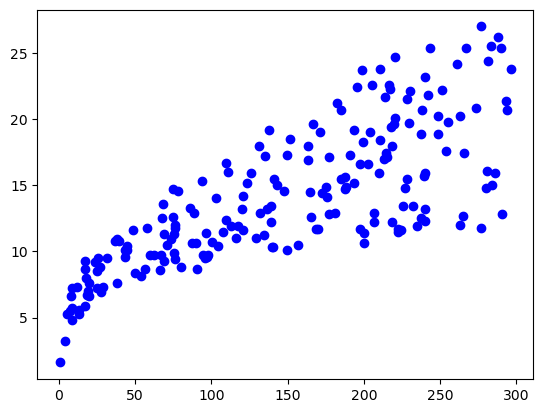

In [16]:
plt.plot(D[['TV']],y,'bo')
plt.show()

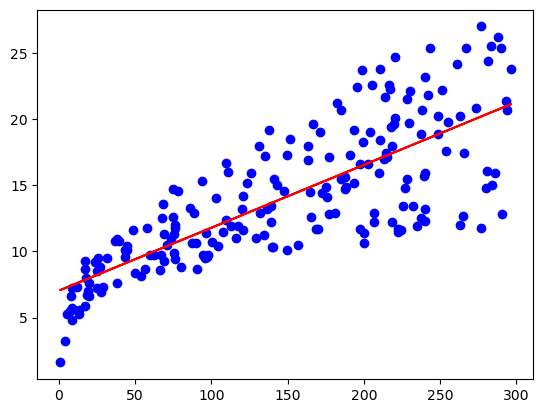

In [18]:
plt.plot(D[['TV']],y,'bo',D[['TV']],np.array(A.dot(sol)),'r')
plt.show()

$$\begin{array}{rcl}\alpha x_1^2 +\beta x_1+\gamma &=&y_1\\ \alpha x_2^2 +\beta x_2+\gamma &=&y_2 \\ ...&=&...\\\alpha x_n^2 +\beta x_n+\gamma&=&y_n\end{array}$$

Lo que nos da la matriz siguiente

$$\begin{bmatrix}x_1^2&x_1&x_1^0\\x_2^2&x_2&x_2^0\\\vdots&\vdots &\vdots\\x_n^2&x_n&x_n^0\end{bmatrix}=\begin{bmatrix}\alpha\\\beta \\\gamma\end{bmatrix}= \begin{bmatrix}y_1\\y_2\\\vdots \\y_n\end{bmatrix}$$

In [32]:
A=pd.concat([D.TV**2,D[['TV','unos']]],axis=1)
A
    

,TV,TV,unos
0,52946.01,230.1,1
1,1980.25,44.5,1
2,295.84,17.2,1
3,22952.25,151.5,1
4,32688.64,180.8,1
...,...,...,...
195,1459.24,38.2,1
196,8873.64,94.2,1
197,31329.00,177.0,1
198,80428.96,283.6,1


In [33]:
AA=np.transpose(A).dot(A)
AA

,TV,TV,unos
TV,2.977499e+11,1.274201e+09,5791118.39
TV,1.274201e+09,5.791118e+06,29408.50
unos,5.791118e+06,2.940850e+04,200.00


In [34]:
b=np.transpose(A).dot(y)
b

,Sales
TV,1.007312e+08
TV,4.821083e+05
unos,2.804500e+03


In [35]:
sol=np.linalg.solve(AA,b)
sol

array([[-6.84693373e-05],
       [ 6.72659270e-02],
       [ 6.11412013e+00]])

In [36]:
res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
res

45.428323830518906

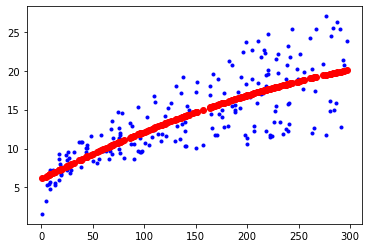

In [39]:
plt.plot(x,y,'b.',x,np.array(A.dot(sol)),'ro')
plt.show()

In [40]:
B=pd.concat([A,y],axis=1)
B

,TV,TV,unos,Sales
0,52946.01,230.1,1,22.1
1,1980.25,44.5,1,10.4
2,295.84,17.2,1,9.3
3,22952.25,151.5,1,18.5
4,32688.64,180.8,1,12.9
...,...,...,...,...
195,1459.24,38.2,1,7.6
196,8873.64,94.2,1,9.7
197,31329.00,177.0,1,12.8
198,80428.96,283.6,1,25.5


In [41]:
B.columns=['TV2','TV',"1's",'Ventas']
B.head()

,TV2,TV,1's,Ventas
0,52946.01,230.1,1,22.1
1,1980.25,44.5,1,10.4
2,295.84,17.2,1,9.3
3,22952.25,151.5,1,18.5
4,32688.64,180.8,1,12.9


In [42]:
B=B.sort_values('TV')
B.head(15)

,TV2,TV,1's,Ventas
130,0.49,0.7,1,1.6
155,16.81,4.1,1,3.2
78,29.16,5.4,1,5.3
56,53.29,7.3,1,5.5
126,60.84,7.8,1,6.6
132,70.56,8.4,1,5.7
8,73.96,8.6,1,4.8
5,75.69,8.7,1,7.2
158,136.89,11.7,1,7.3
108,171.61,13.1,1,5.3


In [43]:
A=B[['TV2','TV',"1's"]]
A

,TV2,TV,1's
130,0.49,0.7,1
155,16.81,4.1,1
78,29.16,5.4,1
56,53.29,7.3,1
126,60.84,7.8,1
...,...,...,...
98,83926.09,289.7,1
35,84506.49,290.7,1
30,85790.41,292.9,1
42,86200.96,293.6,1


In [44]:
y=B[['Ventas']]
y

,Ventas
130,1.6
155,3.2
78,5.3
56,5.5
126,6.6
...,...
98,25.4
35,12.8
30,21.4
42,20.7


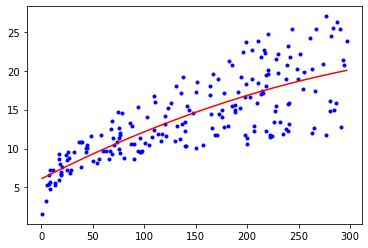

In [45]:
x=B.TV
plt.plot(x,y,'b.',x,np.array(A.dot(sol)),'r')
plt.show()

In [65]:
def RegresionPol(dataset,Vexplicativa,Vobjetivo,grado):
    D=dataset[[Vexplicativa,Vobjetivo]]
    D=D.sort_values(Vexplicativa)
    x=D[[Vexplicativa]]
    y=D[[Vobjetivo]]
    A=x**0
    for i in range(1,grado+1):
        A=pd.concat([x**i,A],axis=1)
    AA=np.transpose(A).dot(A)
    b=np.transpose(A).dot(y)
    sol=np.linalg.solve(AA,b)
    res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
    return x,y,A,sol,res

45.428323830518906


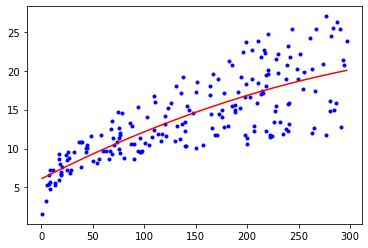

In [66]:
x,y,A,sol,res=RegresionPol(D,'TV','Sales',2)
print(res)
plt.plot(x,y,'b.',x,np.array(A).dot(sol),'r')
plt.show()

44.74839195257017


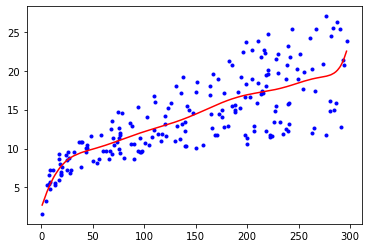

In [68]:
x,y,A,sol,res=RegresionPol(D,'TV','Sales',10)
print(res)
plt.plot(x,y,'b.',x,np.array(A).dot(sol),'r')
plt.show()